C:\Users\zaidf\AppData\Local\Temp\ipykernel_31976\1578604243.py:4: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_df = pd.read_csv('..\\DATA\\combined_data.csv')


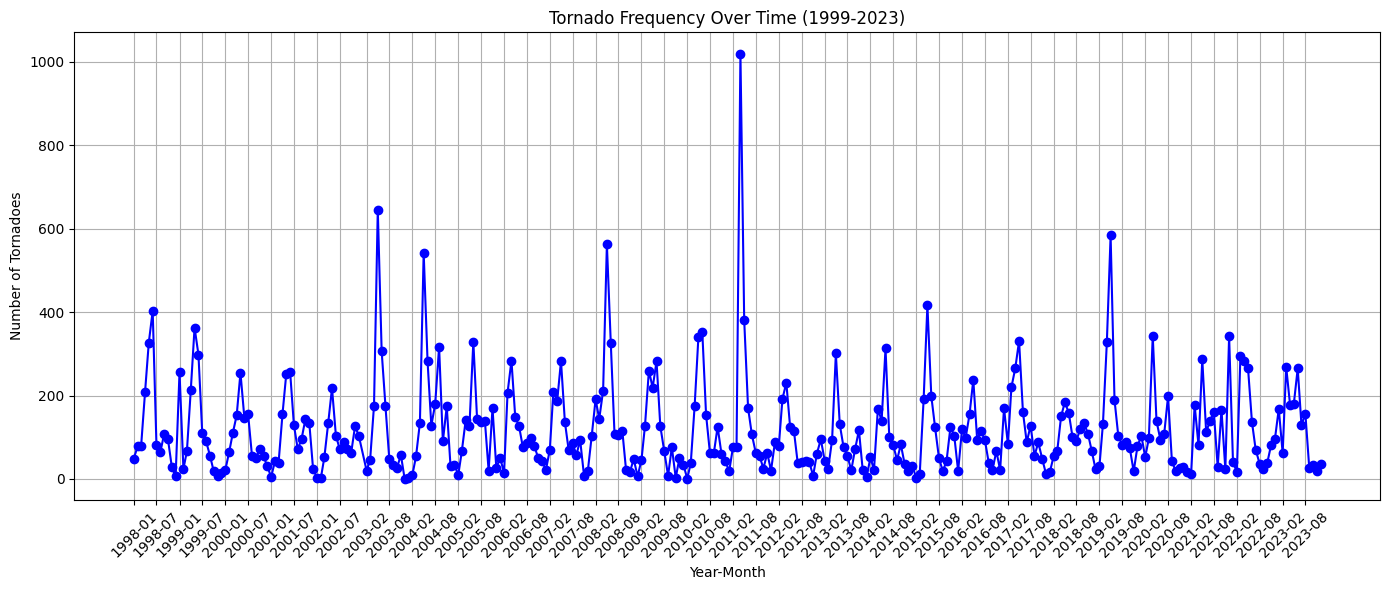

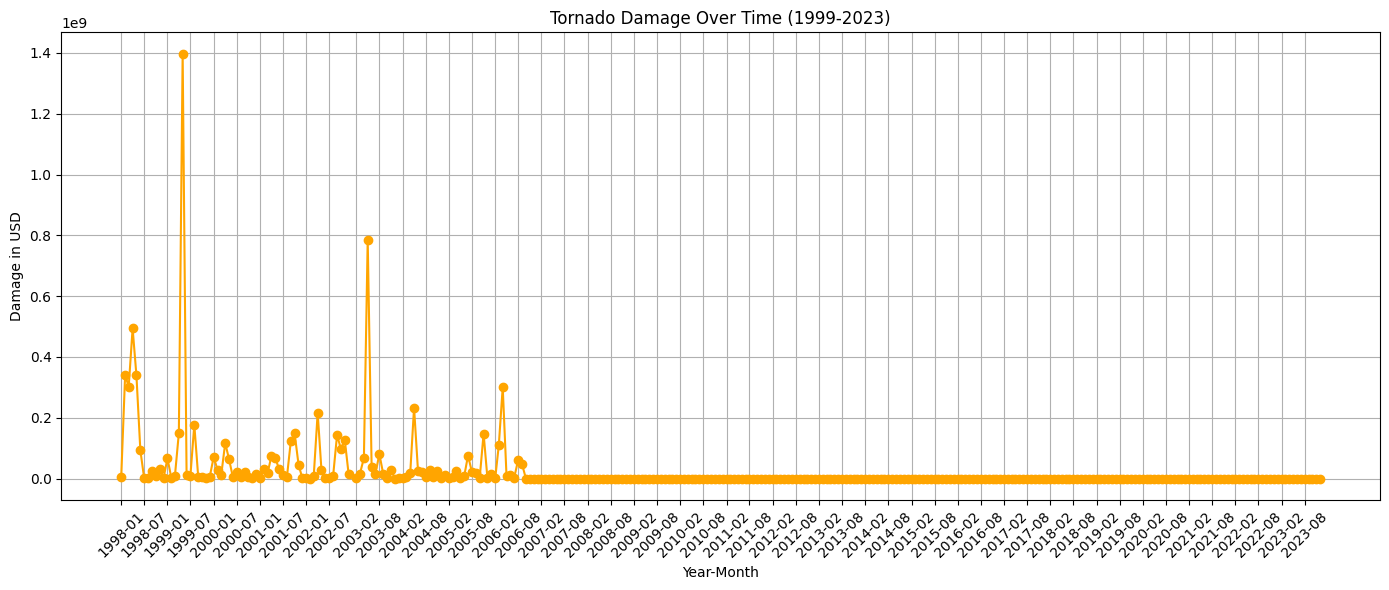

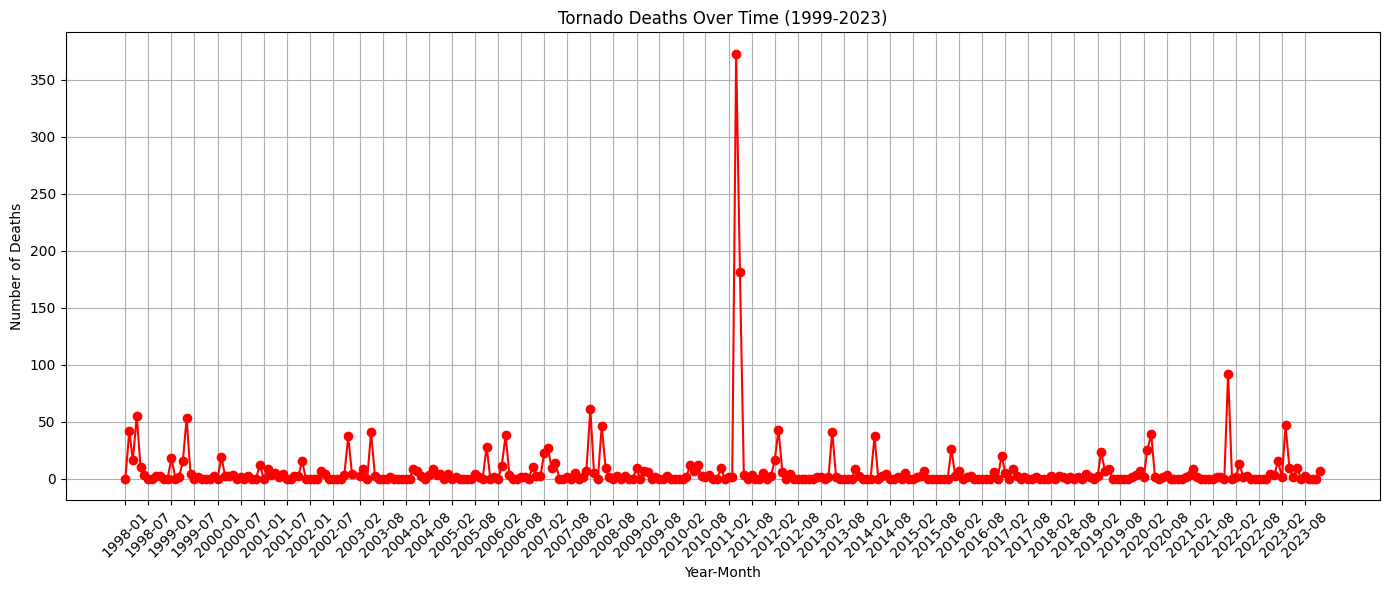

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

combined_df = pd.read_csv('..\\DATA\\combined_data.csv')
# Convert the BEGIN_YEARMONTH column to a datetime format for easier plotting
combined_df['BEGIN_YEARMONTH'] = pd.to_datetime(combined_df['BEGIN_YEARMONTH'].astype(str), format='%Y%m')
filtered_df = combined_df

# Define a function to plot with years and their months
def plot_with_specific_years(x_values, y_values, title, xlabel, ylabel, color='blue'):
    plt.figure(figsize=(14, 6))  # Increase figure size to give more space
    plt.plot(x_values, y_values, marker='o', color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Set x-ticks for every third month
    ax = plt.gca()
    ax.set_xticks(x_values[::6])  # Show every third month to reduce clutter
    ax.set_xticklabels(x_values[::6].strftime('%Y-%m'), rotation=45)
    
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot 1: Tornado Frequency over Time (1999-2023)
tornado_frequency = filtered_df.groupby(filtered_df['BEGIN_YEARMONTH']).size()
plot_with_specific_years(tornado_frequency.index, tornado_frequency.values,
                         title='Tornado Frequency Over Time (1999-2023)',
                         xlabel='Year-Month', ylabel='Number of Tornadoes')

# Plot 2: Tornado Damage over Time (1999-2023)
filtered_df['DAMAGE_PROPERTY'] = pd.to_numeric(filtered_df['DAMAGE_PROPERTY'].str.replace('K', '000').str.replace('M', '000000'), errors='coerce')
tornado_damage = filtered_df.groupby(filtered_df['BEGIN_YEARMONTH'])['DAMAGE_PROPERTY'].sum()
plot_with_specific_years(tornado_damage.index, tornado_damage.values,
                         title='Tornado Damage Over Time (1999-2023)',
                         xlabel='Year-Month', ylabel='Damage in USD', color='orange')

# Plot 3: Tornado Deaths over Time (for 1999-2023)
filtered_df['TOTAL_DEATHS'] = filtered_df['DEATHS_DIRECT'] + filtered_df['DEATHS_INDIRECT']
tornado_deaths = filtered_df.groupby(filtered_df['BEGIN_YEARMONTH'])['TOTAL_DEATHS'].sum()
plot_with_specific_years(tornado_deaths.index, tornado_deaths.values,
                         title='Tornado Deaths Over Time (1999-2023)',
                         xlabel='Year-Month', ylabel='Number of Deaths', color='red')

